# <span style="color:red"> FOREST FIRES IN BRAZIL </span>

See <https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil> for a full description of the dataset.

Import packages

In [3]:
%matplotlib notebook
%matplotlib inline
import pandas as pd #Handle datasets
import seaborn as sns #Plots
import matplotlib.pyplot as plt  #Plots

#Set some graphical parameters
rc={'axes.labelsize': 25, 'figure.figsize': (20,10), 
    'axes.titlesize': 25, 'xtick.labelsize': 18, 'ytick.labelsize': 18}
sns.set(rc=rc)

#Path data
path = 'C:/Users/Angela Andreella/Documents/Conference_Talk/Python_Psicostat1/Data'
df = pd.read_csv(path + '/amazon.csv')

First $3$ observations:

In [476]:
df.head(n=3)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01


Some **information** about the variables:

In [477]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


We are interested about the **number of forest fires** in Brazil

In [478]:
df.number.describe()

count    6454.000000
mean      108.293163
std       190.812242
min         0.000000
25%         3.000000
50%        24.000000
75%       113.000000
max       998.000000
Name: number, dtype: float64

To have an simple plot, we take a subset of the dataset:

In [5]:
df1 = df[(df.year > 2010) & (df.year < 2019)]
df1 =df1.loc[(df1.state.str.startswith('M'))]

We do a **boxplot** about the number of fire by groups, i.e., the **states** and the **years**.

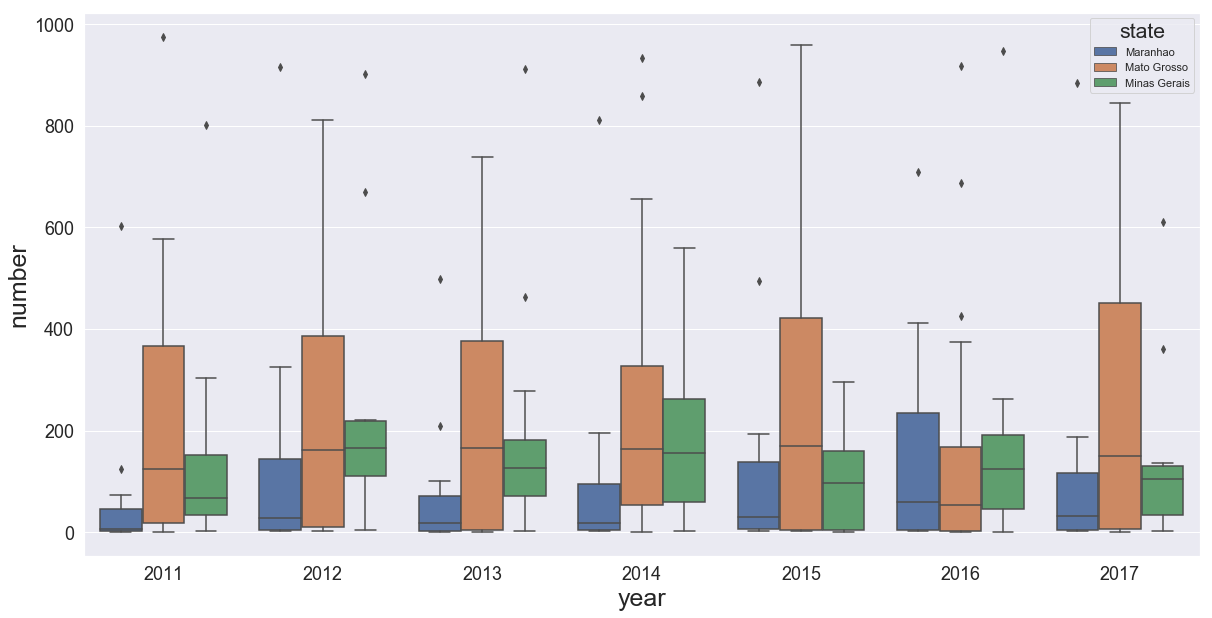

In [488]:
sns.boxplot(x = 'year', y = 'number', hue = "state", data = df1) 

We do a **timeseries plot with error bands**:

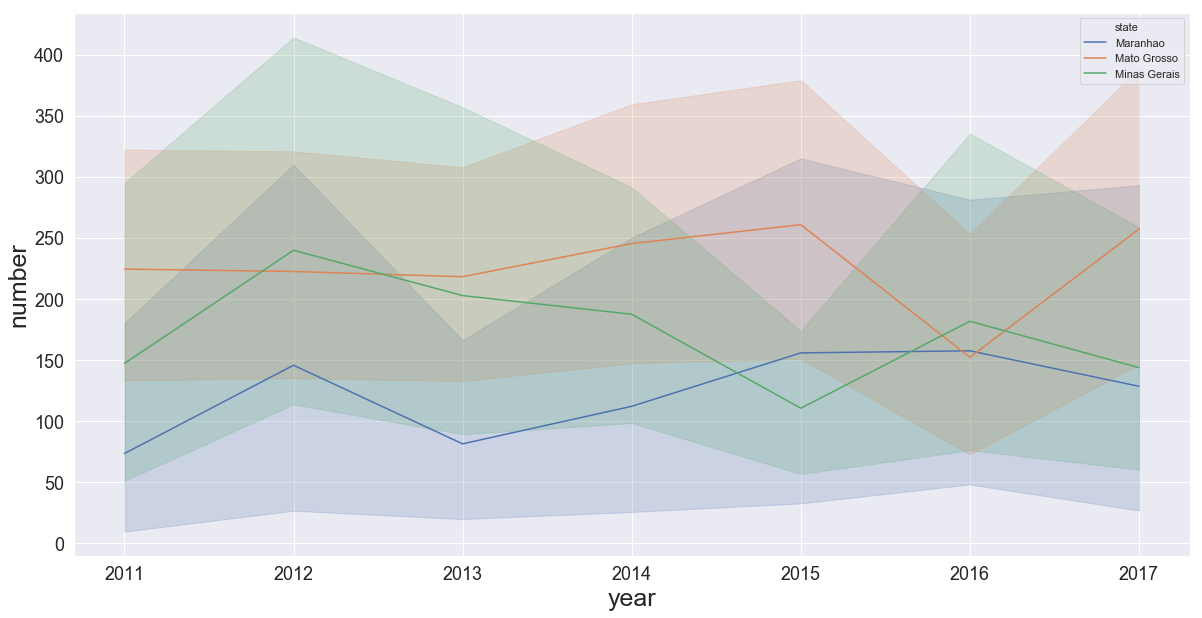

In [489]:
sns.lineplot(x="year", y="number",hue="state", data=df1)


also we do a **grouped violinplots**:

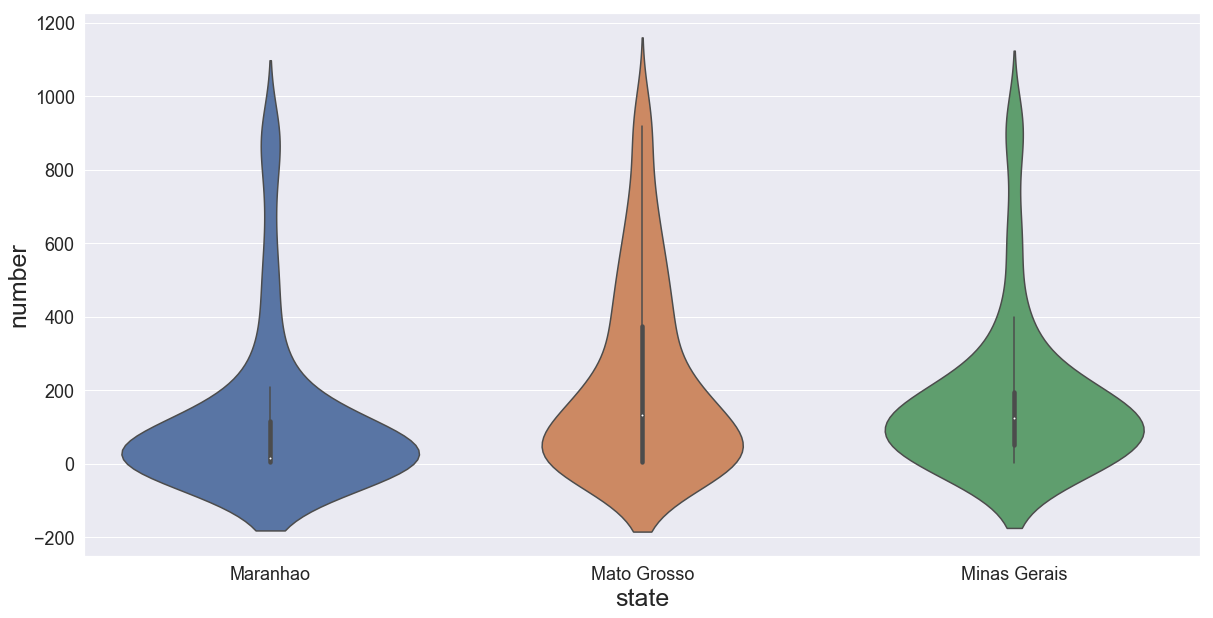

In [490]:
sns.violinplot(x="state", y="number", data=df1)  

For other plots, please see <https://seaborn.pydata.org/examples/index.html>.

# <span style="color:red"> ECONOMIC FREEDOM INDEX</span>

See <https://www.kaggle.com/lewisduncan93/the-economic-freedom-index> for a full description of the dataset.

Load and preprocess data

In [17]:
dt = pd.read_csv(path + '/economic_freedom_index2019_data.csv')
dt.columns = dt.columns.str.replace(' ', '')
dt.columns = dt.columns.str.replace('2019', '')
dt.columns = dt.columns.str.replace('%', '')
dt.columns = dt.columns.str.replace('(', '')
dt.columns = dt.columns.str.replace(')', '')
dt = dt.dropna(axis = 0,how='any')

Basic info 

In [485]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 185
Data columns (total 34 columns):
CountryID                173 non-null int64
CountryName              173 non-null object
WEBNAME                  173 non-null object
Region                   173 non-null object
WorldRank                173 non-null float64
RegionRank               173 non-null float64
Score                    173 non-null float64
PropertyRights           173 non-null float64
JudicalEffectiveness     173 non-null float64
GovernmentIntegrity      173 non-null float64
TaxBurden                173 non-null float64
Gov'tSpending            173 non-null float64
FiscalHealth             173 non-null float64
BusinessFreedom          173 non-null float64
LaborFreedom             173 non-null float64
MonetaryFreedom          173 non-null float64
TradeFreedom             173 non-null float64
InvestmentFreedom        173 non-null float64
FinancialFreedom         173 non-null float64
TariffRate               1

## <span style="color:blue"> Some plots </span>

Boxplot by group, i.e. **region**:

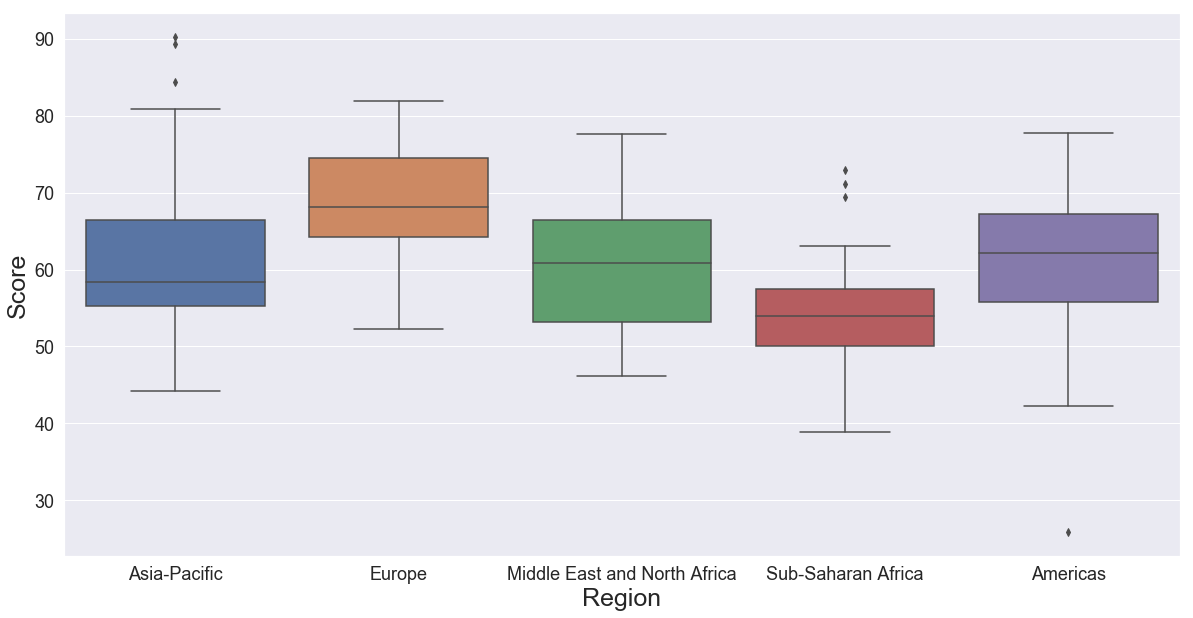

In [491]:
sns.boxplot(x = 'Region', y = 'Score', data = dt) 

First **scatter plot**:

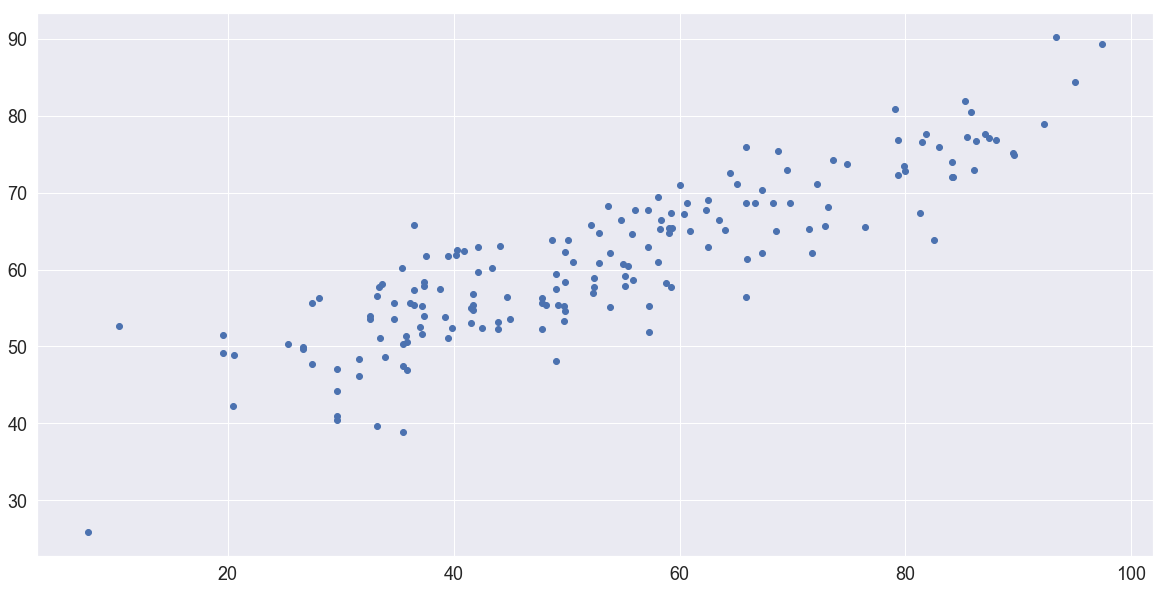

In [474]:
plt.scatter(x="PropertyRights", y="Score", data=dt)

We can put directly the **linear regression fitting**:

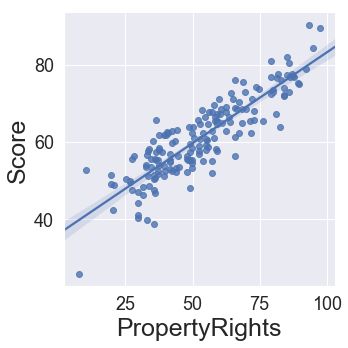

In [492]:
sns.lmplot(x="PropertyRights", y="Score", data=dt)

Density plot of the **score** variable:

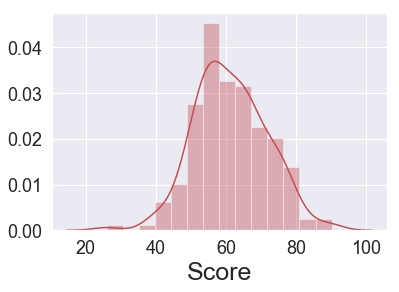

In [493]:
sns.distplot(dt.Score, color="r")

**Pair plot** considering some variables, i.e. Property Rights, Labor Freedom, Government Integrity, Judical Effectiveness, Fiscal Health, Region and Score:

In [298]:
dt1 = dt[['PropertyRights', 'LaborFreedom', 'GovernmentIntegrity', 'JudicalEffectiveness','FiscalHealth', "Score", 'Region']]

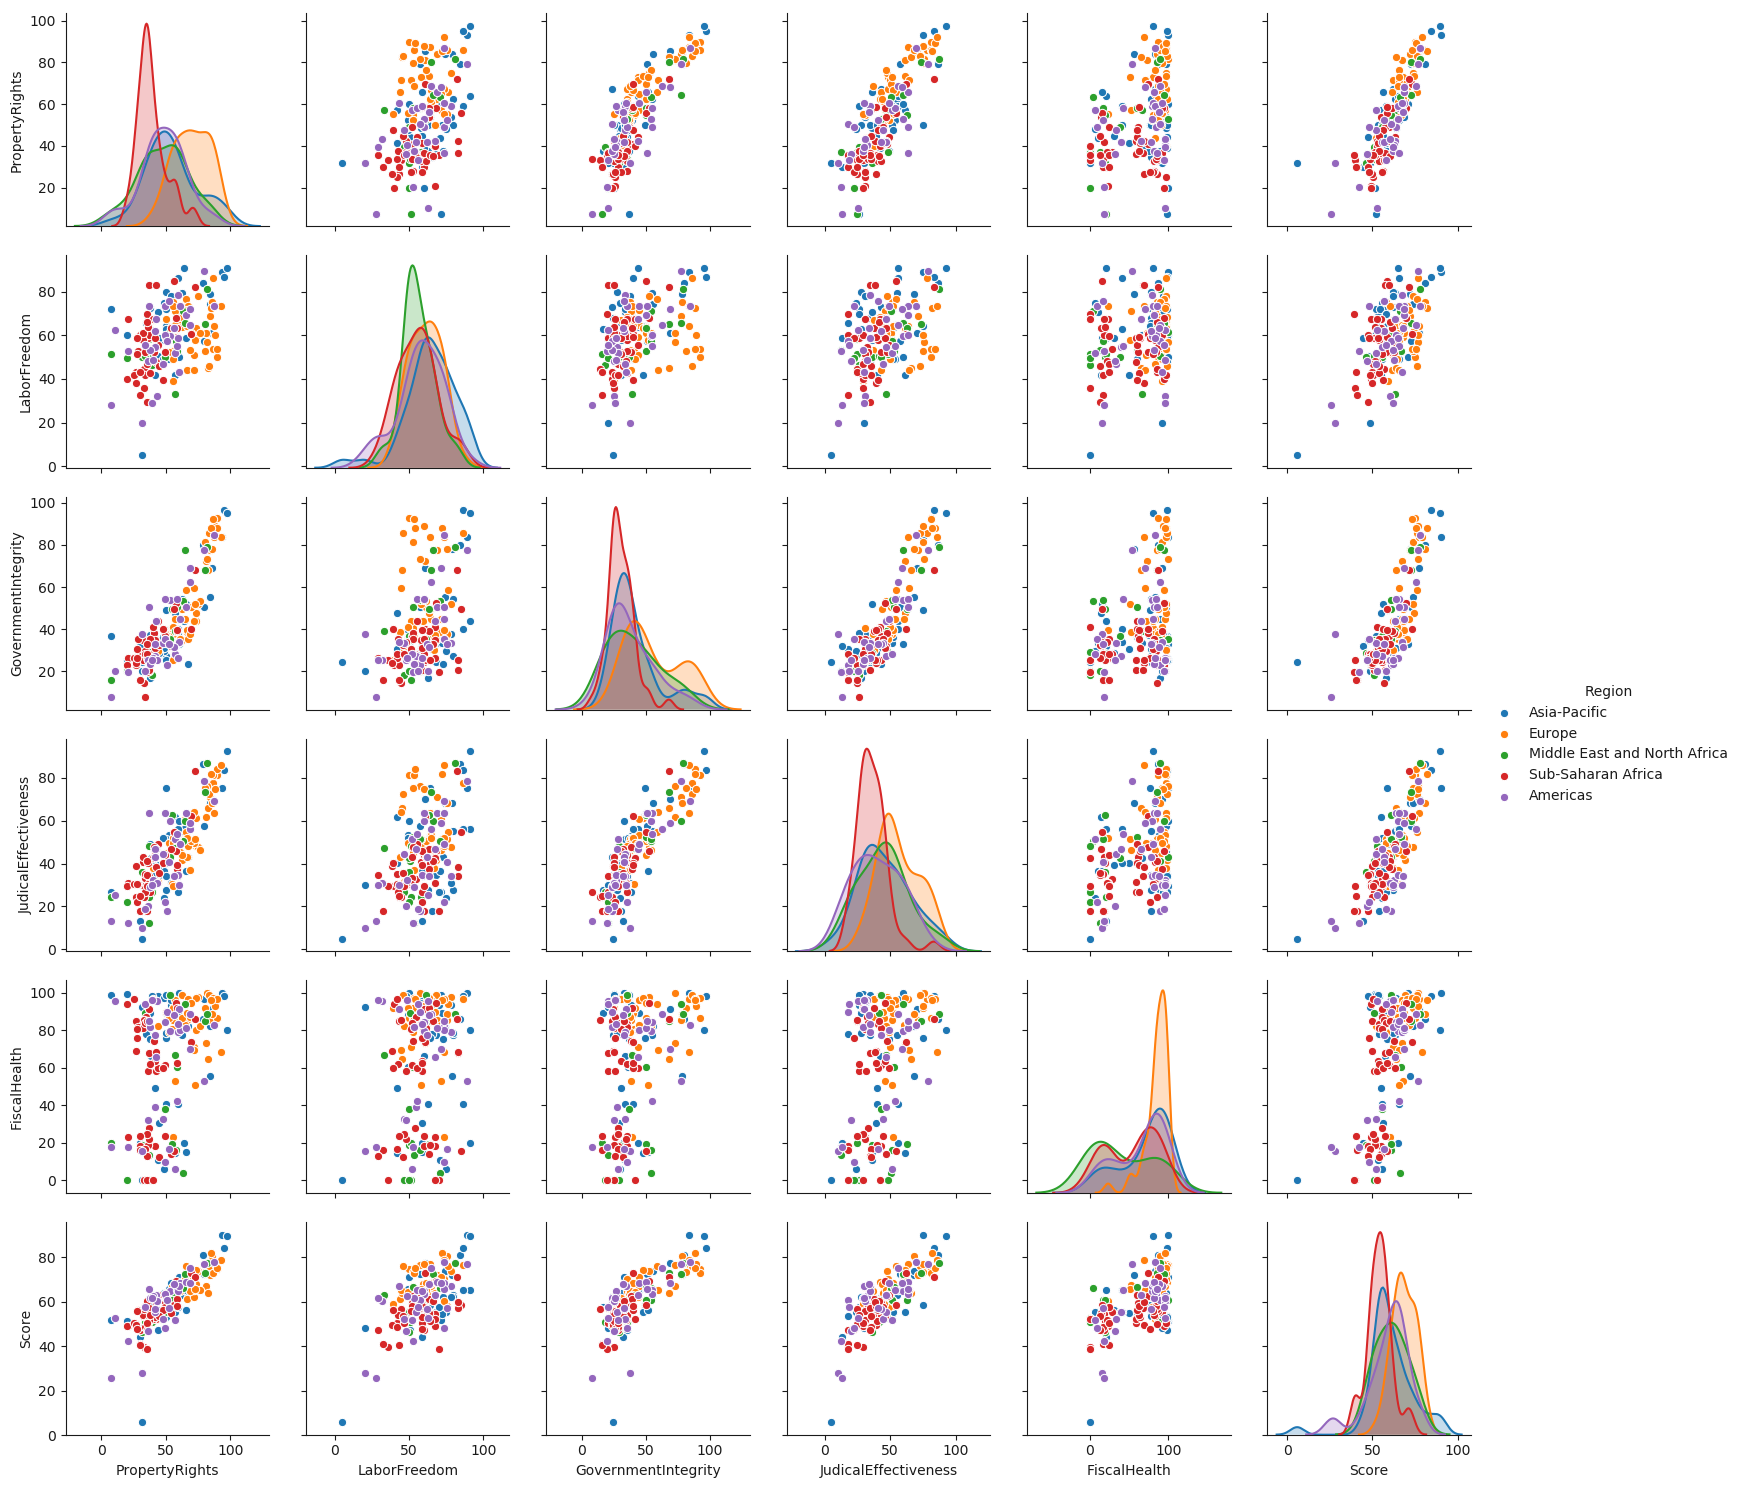

In [497]:
matplotlib.rc_file_defaults()
sns.pairplot(dt1, hue="Region")

# <span style="color:blue"> Linear regression </span>

Import packages 

In [432]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

Correlation matrix

In [358]:
corr = dt[['PropertyRights', 'LaborFreedom', 'GovernmentIntegrity', 'JudicalEffectiveness','FiscalHealth', "Score"]].corr()
corr

,PropertyRights,LaborFreedom,GovernmentIntegrity,JudicalEffectiveness,FiscalHealth,Score
PropertyRights,1.000000,0.432746,0.866998,0.826805,0.329969,0.876601
LaborFreedom,0.432746,1.000000,0.413794,0.421694,0.104431,0.512976
GovernmentIntegrity,0.866998,0.413794,1.000000,0.888880,0.292240,0.818174
JudicalEffectiveness,0.826805,0.421694,0.888880,1.000000,0.287380,0.805825
FiscalHealth,0.329969,0.104431,0.292240,0.287380,1.000000,0.559395
Score,0.876601,0.512976,0.818174,0.805825,0.559395,1.000000


Heatmap of the **correlation matrix**:

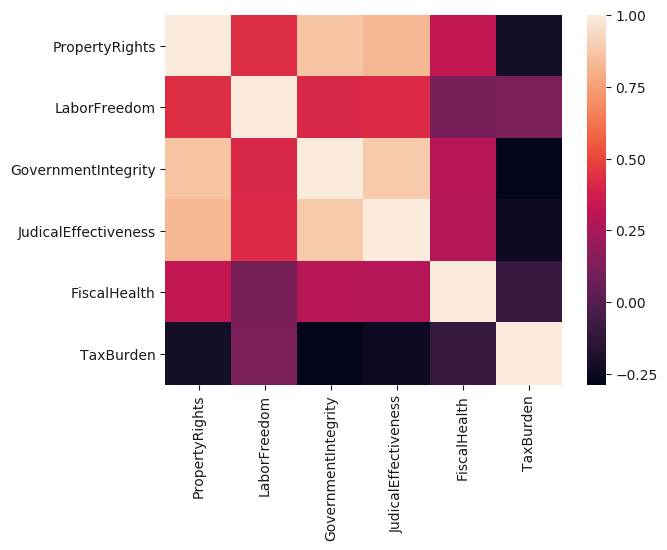

In [498]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

We split the dataset into training (0.8) and test set (0.2):

In [421]:
msk = np.random.rand(len(dt)) < 0.8
train = dt[msk]
test = dt[~msk]

**Linear regression** having as dependent variable the **Score** and PropertyRights, LaborFreedom and FiscalHealth as explicative variables:

In [422]:
results = smf.ols('Score ~ PropertyRights + LaborFreedom + FiscalHealth', data=train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     335.6
Date:                Tue, 26 Nov 2019   Prob (F-statistic):           4.18e-62
Time:                        14:50:56   Log-Likelihood:                -368.66
No. Observations:                 138   AIC:                             745.3
Df Residuals:                     134   BIC:                             757.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         27.2738      1.444     18.881      0.000      24.417      30.131
PropertyRights     0.3903      0.019     20.505      0.000       0.353       0.428
LaborFreedom       0.0997      0.024      4.084      0.000       0.051       0.148
FiscalHealth       0.1062      0.011     10.062      0.000       0.085       0.127
==============================================================================
Omnibus:                        4.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.113   Jarque-Bera (JB):                4.082
Skew:                          -0.420   Prob(JB):                        0.130
Kurtosis:                       3.065   Cond. No.                         514.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We **predict** the score values using the test set:

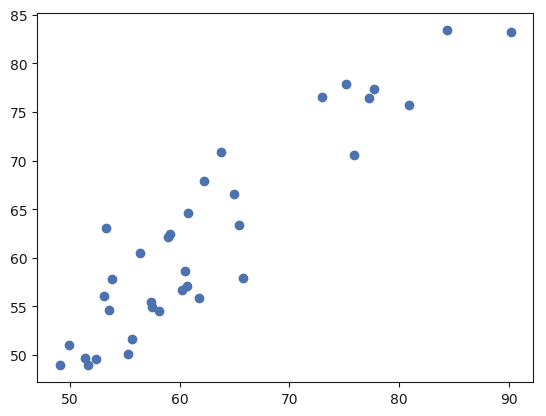

In [499]:
pred = results.predict(test)
plt.scatter(test.Score, pred,  color='b')

Compute the **mean squared error**:

In [440]:
mean_squared_error(test.Score, pred)

17.15400732386189

We try to use a **linear mixed model**, considering as random effects the Region variable.

In [500]:
md = smf.mixedlm("Score ~ PropertyRights + LaborFreedom + FiscalHealth", train, groups="Region")
mdf = md.fit()
mdf.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:              MixedLM Dependent Variable: Score    
No. Observations:   138     Method:             REML     
No. Groups:         5       Scale:              11.7894  
Min. group size:    12      Likelihood:         -376.7216
Max. group size:    34      Converged:          Yes      
Mean group size:    27.6                                 
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      26.215    1.628 16.103 0.000 23.025 29.406
PropertyRights  0.402    0.021 18.871 0.000  0.361  0.444
LaborFreedom    0.102    0.024  4.211 0.000  0.055  0.150
FiscalHealth    0.114    0.011 10.372 0.000  0.092  0.135
Region Var      1.455    0.456                           
=========================================================

"""

See <http://www.statsmodels.org/stable/index.html> for other commands about the linear (mixed) model. Also, <https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html> makes a comparison between R lmer and Statsmodels MixedLM.

# <span style="color:blue"> Principal Component Analysis </span>

Import packages:

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

Standardize data:

In [18]:
features = ['PropertyRights', 'LaborFreedom', 'GovernmentIntegrity', 'JudicalEffectiveness','FiscalHealth']
# Separating out the features
x = dt.loc[:, features].values
# Separating out the target
y = dt.loc[:,'Score'].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

Perform PCA considering $2$ principal components:

In [40]:
pca = PCA(4)
projected = pca.fit_transform(x)

In [41]:
print(x.shape)
print(projected.shape)

(173L, 5L)
(173L, 4L)


Plot the first $2$ principal components:

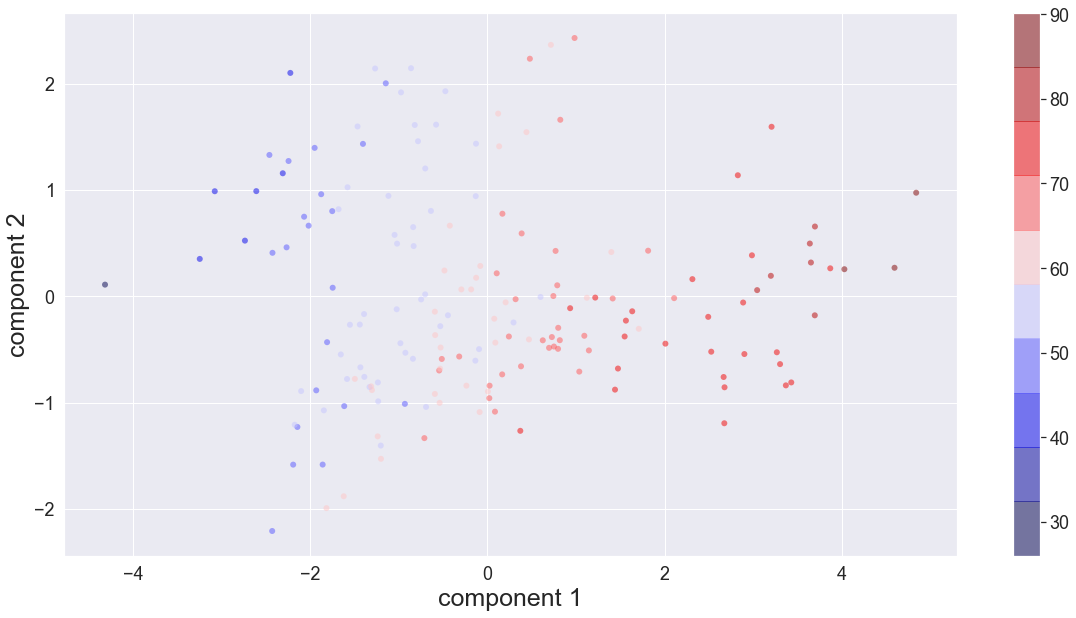

In [42]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('seismic', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

([<matplotlib.axis.XTick at 0x12ac31d0>,
 <a list of 4 Text xticklabel objects>)

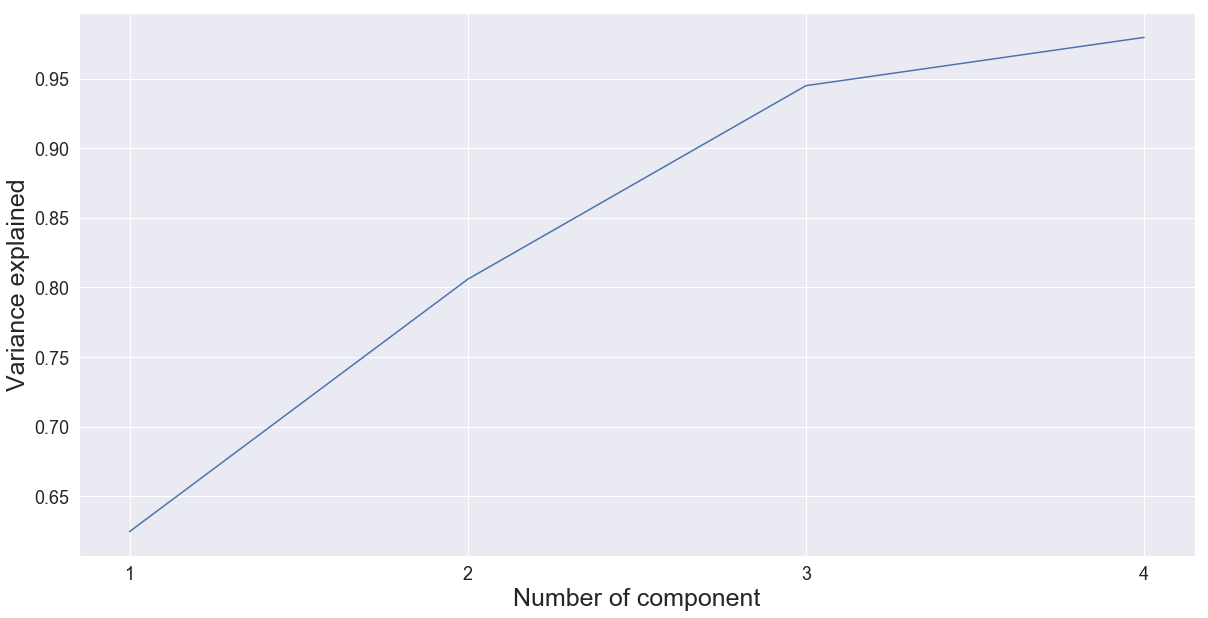

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel("Number of component") 
plt.ylabel("Variance explained")
plt.xticks(range(4), [1,2,3,4])